In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_cond = city_weather["weather"]["description"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kurilsk
Processing Record 2 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 3 of Set 1 | butaritari
Processing Record 4 of Set 1 | san cristobal
Processing Record 5 of Set 1 | dubrovnik
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | tuktoyaktuk
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | samusu
City not found. Skipping...
Processing Record 11 of Set 1 | kamloops
Processing Record 12 of Set 1 | skalistyy
City not found. Skipping...
Processing Record 13 of Set 1 | port alfred
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | dikson
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | belushya guba
City not found. Skipping..

Processing Record 36 of Set 4 | maniitsoq
Processing Record 37 of Set 4 | hasaki
Processing Record 38 of Set 4 | chajul
Processing Record 39 of Set 4 | sungaipenuh
Processing Record 40 of Set 4 | ulaangom
Processing Record 41 of Set 4 | turburea
Processing Record 42 of Set 4 | grindavik
Processing Record 43 of Set 4 | eydhafushi
Processing Record 44 of Set 4 | taree
Processing Record 45 of Set 4 | kulhudhuffushi
Processing Record 46 of Set 4 | vardo
Processing Record 47 of Set 4 | dicabisagan
Processing Record 48 of Set 4 | tank
Processing Record 49 of Set 4 | luau
Processing Record 50 of Set 4 | pak phanang
Processing Record 1 of Set 5 | lusambo
Processing Record 2 of Set 5 | kokoda
Processing Record 3 of Set 5 | filingue
Processing Record 4 of Set 5 | deva
Processing Record 5 of Set 5 | velingara
Processing Record 6 of Set 5 | praia
Processing Record 7 of Set 5 | qostanay
Processing Record 8 of Set 5 | richards bay
Processing Record 9 of Set 5 | kalaleh
Processing Record 10 of Set 5 

Processing Record 27 of Set 8 | dwarka
Processing Record 28 of Set 8 | marawi
Processing Record 29 of Set 8 | san pedro
Processing Record 30 of Set 8 | severobaykalsk
Processing Record 31 of Set 8 | husavik
Processing Record 32 of Set 8 | nome
Processing Record 33 of Set 8 | sitges
Processing Record 34 of Set 8 | jarabacoa
Processing Record 35 of Set 8 | qasigiannguit
Processing Record 36 of Set 8 | saint george
Processing Record 37 of Set 8 | astana
Processing Record 38 of Set 8 | santiago
Processing Record 39 of Set 8 | ixtapa
Processing Record 40 of Set 8 | saint-denis
Processing Record 41 of Set 8 | san francisco
Processing Record 42 of Set 8 | sonoita
Processing Record 43 of Set 8 | morros
Processing Record 44 of Set 8 | sohag
Processing Record 45 of Set 8 | vestmanna
Processing Record 46 of Set 8 | shihezi
Processing Record 47 of Set 8 | nguiu
City not found. Skipping...
Processing Record 48 of Set 8 | jackson
Processing Record 49 of Set 8 | mena
Processing Record 50 of Set 8 | c

Processing Record 13 of Set 12 | zaria
Processing Record 14 of Set 12 | ozinki
Processing Record 15 of Set 12 | beloha
Processing Record 16 of Set 12 | plettenberg bay
Processing Record 17 of Set 12 | terrell
Processing Record 18 of Set 12 | muzquiz
City not found. Skipping...
Processing Record 19 of Set 12 | bonavista
Processing Record 20 of Set 12 | catio
Processing Record 21 of Set 12 | port arthur
Processing Record 22 of Set 12 | duluth
Processing Record 23 of Set 12 | morondava
Processing Record 24 of Set 12 | muli
Processing Record 25 of Set 12 | waipawa
Processing Record 26 of Set 12 | scottsburgh
City not found. Skipping...
Processing Record 27 of Set 12 | vigrestad
Processing Record 28 of Set 12 | ruston
Processing Record 29 of Set 12 | niquero
Processing Record 30 of Set 12 | colgong
Processing Record 31 of Set 12 | sinnamary
Processing Record 32 of Set 12 | broken hill
Processing Record 33 of Set 12 | neuquen
Processing Record 34 of Set 12 | mopipi
Processing Record 35 of Se

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kurilsk,45.2333,147.8833,40.59,98,100,6.96,RU,2021-05-24 20:04:33
1,Butaritari,3.0707,172.7902,76.42,95,100,19.80,KI,2021-05-24 20:03:24
2,San Cristobal,7.7669,-72.2250,75.38,94,100,5.32,VE,2021-05-24 20:04:33
3,Dubrovnik,42.6481,18.0922,73.04,77,20,10.87,HR,2021-05-24 20:04:34
4,Pevek,69.7008,170.3133,31.78,80,100,4.03,RU,2021-05-24 20:04:34
5,Thompson,55.7435,-97.8558,51.96,87,90,4.61,CA,2021-05-24 20:00:15
6,Tuktoyaktuk,69.4541,-133.0374,33.60,75,9,5.08,CA,2021-05-24 20:04:35
7,Jamestown,42.0970,-79.2353,77.02,59,90,5.01,US,2021-05-24 20:04:08
8,Kamloops,50.6665,-120.3192,68.58,38,100,5.99,CA,2021-05-24 20:02:53
9,Port Alfred,-33.5906,26.8910,73.09,40,100,13.02,ZA,2021-05-24 20:04:36


In [8]:
city_data_df.keys()

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [9]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kurilsk,RU,2021-05-24 20:04:33,45.2333,147.8833,40.59,98,100,6.96
1,Butaritari,KI,2021-05-24 20:03:24,3.0707,172.7902,76.42,95,100,19.80
2,San Cristobal,VE,2021-05-24 20:04:33,7.7669,-72.2250,75.38,94,100,5.32
3,Dubrovnik,HR,2021-05-24 20:04:34,42.6481,18.0922,73.04,77,20,10.87
4,Pevek,RU,2021-05-24 20:04:34,69.7008,170.3133,31.78,80,100,4.03
5,Thompson,CA,2021-05-24 20:00:15,55.7435,-97.8558,51.96,87,90,4.61
6,Tuktoyaktuk,CA,2021-05-24 20:04:35,69.4541,-133.0374,33.60,75,9,5.08
7,Jamestown,US,2021-05-24 20:04:08,42.0970,-79.2353,77.02,59,90,5.01
8,Kamloops,CA,2021-05-24 20:02:53,50.6665,-120.3192,68.58,38,100,5.99
9,Port Alfred,ZA,2021-05-24 20:04:36,-33.5906,26.8910,73.09,40,100,13.02


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

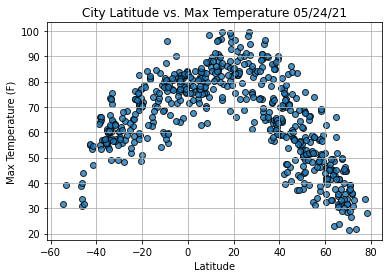

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

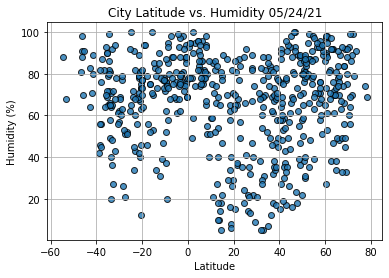

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

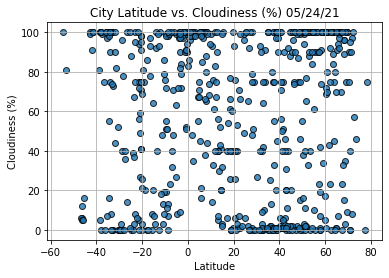

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

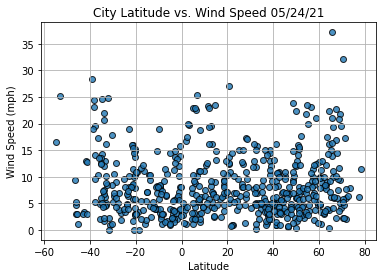

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
index13 = city_data_df.loc[13]
index13

City               Severo-Kurilsk
Country                        RU
Date          2021-05-24 20:04:38
Lat                       50.6789
Lng                       156.125
Max Temp                     39.9
Humidity                       76
Cloudiness                     99
Wind Speed                  14.16
Name: 13, dtype: object

In [22]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
568    False
569    False
570     True
571     True
572    False
Name: Lat, Length: 573, dtype: bool

In [23]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kurilsk,RU,2021-05-24 20:04:33,45.2333,147.8833,40.59,98,100,6.96
1,Butaritari,KI,2021-05-24 20:03:24,3.0707,172.7902,76.42,95,100,19.80
2,San Cristobal,VE,2021-05-24 20:04:33,7.7669,-72.2250,75.38,94,100,5.32
3,Dubrovnik,HR,2021-05-24 20:04:34,42.6481,18.0922,73.04,77,20,10.87
4,Pevek,RU,2021-05-24 20:04:34,69.7008,170.3133,31.78,80,100,4.03
...,...,...,...,...,...,...,...,...,...
565,Chulym,RU,2021-05-24 20:08:02,55.0997,80.9572,57.94,69,61,2.80
566,Sfantu Gheorghe,RO,2021-05-24 20:08:02,45.8667,25.7833,59.94,68,96,5.99
567,Arman,RU,2021-05-24 20:08:03,59.7000,150.1667,43.92,65,17,1.30
570,Puksoozero,RU,2021-05-24 20:08:04,62.5903,40.6066,49.32,97,100,8.41


In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kurilsk,RU,2021-05-24 20:04:33,45.2333,147.8833,40.59,98,100,6.96
1,Butaritari,KI,2021-05-24 20:03:24,3.0707,172.7902,76.42,95,100,19.80
2,San Cristobal,VE,2021-05-24 20:04:33,7.7669,-72.2250,75.38,94,100,5.32
3,Dubrovnik,HR,2021-05-24 20:04:34,42.6481,18.0922,73.04,77,20,10.87
4,Pevek,RU,2021-05-24 20:04:34,69.7008,170.3133,31.78,80,100,4.03


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

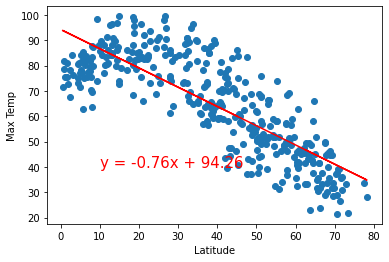

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

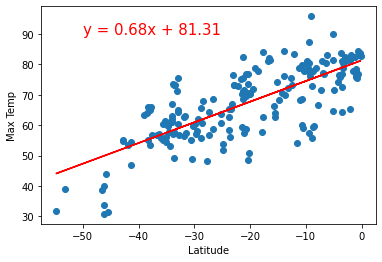

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

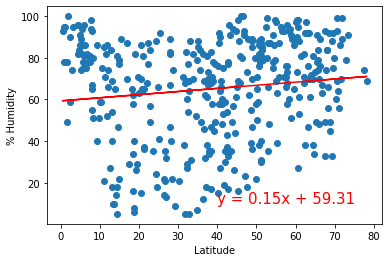

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

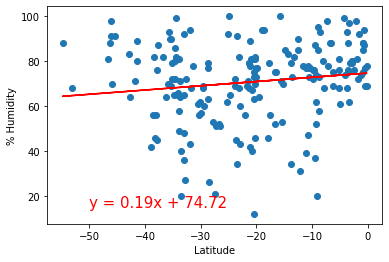

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

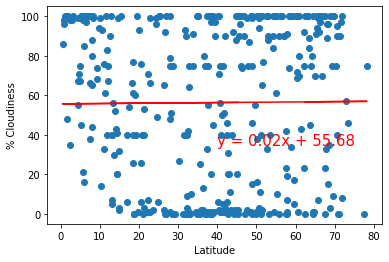

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Cloudiness',(40,35))

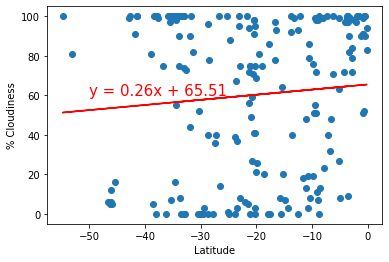

In [39]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

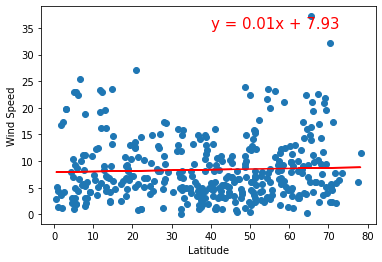

In [42]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

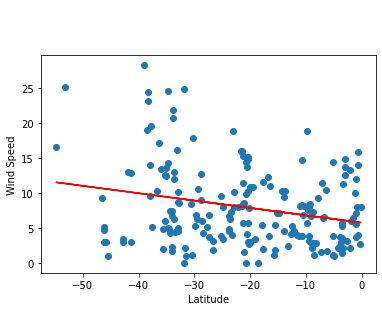

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))